In [1]:
# 封装显示图片的函数
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

# 读取马里奥图片和金币模板图
img = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.jpg', 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8

# 匹配相关系数>0.8，可认为是匹配到的位置
# loc是
loc = np.where(res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):  # *号表示可选参数
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img, pt, bottom_right, (0, 0, 255), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  41,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  42,
        42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  42,
        43,  43,  43,  43,  43,  72,  72,  72,  72,  72,  72,  72,  72,
        72,  72,  72,  72,  72,  73,  73,  73,  73,  73,  73,  73,  73,
        73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,
        74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,
        74,  74,  74,  74,  74,  74,  74,  75,  75,  75,  75,  75,  75,
        75, 104, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 106,
       106, 106, 106], dtype=int64), array([ 69,  70,  83,  84,  97,  98, 111, 112, 125, 126,  68,  69,  70,
        82,  83,  84,  96,  97,  98, 110, 111, 112, 124, 125, 126,  68,
        69,  70,  82,  83,  84,  96,  97,  98, 110, 111, 112, 125, 126,
        69,  83,  97, 111, 125,  54,  55,  69,  83,  84,  97,  98, 111,
       112, 125, 126, 139,

img.shape=(263, 263, 3),template.shape=(110, 85, 3),res.shape=(154, 179)
min_val=256897.0,min_loc=(107, 89),max_val=200943056.0,max_loc=(157, 45)


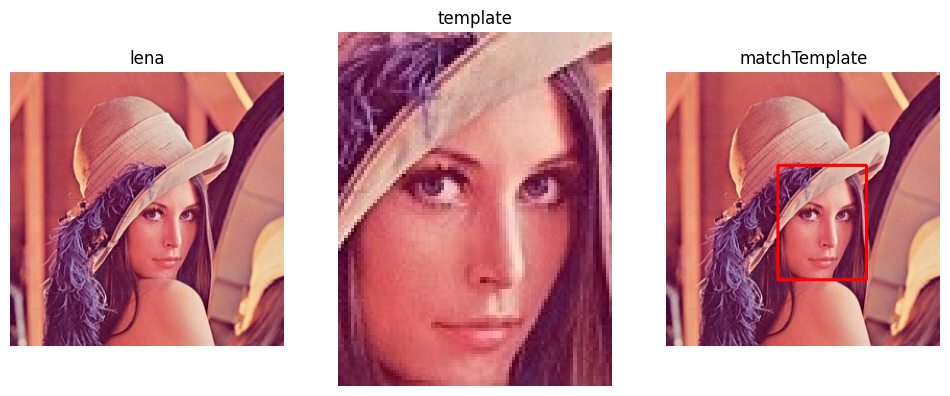

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('lena.jpg')
template = cv2.imread('face.jpg')
h,w=template.shape[:2]

res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
print(f'{img.shape=},{template.shape=},{res.shape=}')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(f'{min_val=},{min_loc=},{max_val=},{max_loc=}')

# 标记出最佳匹配位置,即以min_loc为左上角画一个template同尺寸的矩形。
img_copy=img.copy()
cv2.rectangle(img_copy,min_loc,(min_loc[0]+w,min_loc[1]+h),(0,0,255),2)

plt.figure(figsize=[12,6]);
plt.subplot(131); plt.imshow(img[:,:,::-1]);plt.axis('off');plt.title("lena");
plt.subplot(132); plt.imshow(template[:,:,::-1],aspect='equal');plt.axis('off');plt.title("template");
plt.subplot(133); plt.imshow(img_copy[:,:,::-1]);plt.axis('off');plt.title("matchTemplate");

In [ ]:
import cv2 
import numpy as np

img = cv2.imread('./ocr_a_reference.png')
# 灰度化处理
ref = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 二值化处理
_, ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)

# 查找轮廓，mode为只查找最外层轮廓w
ref_contours, _ = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 画出外轮廓
cv2.drawContours(img, ref_contours, -1, (0, 0, 255), 3)
# cv_show('img', img)
# 表示数字的轮廓
print(np.array(ref_contours, dtype='object').shape)
# 对轮廓进行排序, 按照数字大小进行排序, 方便后面使用.
# 排序思路: 根据每个数字的最大外接矩形的x轴坐标进行排序
# 计算每个轮廓的外接矩形
bounding_boxes = [cv2.boundingRect(c) for c in ref_contours]
# print(bounding_boxes)
# print(sorted(bounding_boxes, key=lambda b: b[0]))
# 要把排序之后的外接矩形和轮廓建立对应关系.
(ref_contours, bounding_boxes) = zip(*sorted(zip(ref_contours, bounding_boxes), key=lambda b: b[1][0]))
digits = {}
for (i, c) in enumerate(ref_contours):
    # 重新计算外接矩形
    (x, y, w, h) = cv2.boundingRect(c)
    # region of interest 感兴趣的区域
    # 取出每个数字
    roi = ref[y:y + h, x: x + w]
    # resize成合适的大小
    roi = cv2.resize(roi, (57, 88))
    digits[i] = roi
# print(digits)

In [ ]:
# 对信用卡图片进行处理
image = cv2.imread('./credit_card_05.png')
# cv_show('image', image)
# 对信用卡图片进行resize
# 为了保证原图不拉伸, 需要计算出原图的长宽比.
h, w = image.shape[:2]
width = 300
r = width / w
image = cv2.resize(image, (300, int(h * r)))
# cv_show('image', image)
# 灰度化处理
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv_show('gray', gray)

# 接下来是形态学的各种操作
# 顶帽操作, 突出更明亮的区域
# 初始化卷积核
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rect_kernel)
# cv_show('tophat', tophat)

# sobel算子
grad_x = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
# print(grad_x)
# 对grad_x进行处理
# 只用x轴方向的梯度
grad_x = np.absolute(grad_x)
# 再把grad_x变成0到255之间的整数
min_val, max_val = np.min(grad_x), np.max(grad_x)
grad_x = ((grad_x - min_val) / (max_val - min_val)) * 255
# 修改一下数据类型
grad_x = grad_x.astype('uint8')
# cv_show('grad_x', grad_x)

# grad_y = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
# # print(grad_x)
# # 对grad_x进行处理
# grad_y = np.absolute(grad_y)
# # 再把grad_x变成0到255之间的整数
# min_val, max_val = np.min(grad_y), np.max(grad_y)
# grad_y = ((grad_y - min_val) / (max_val - min_val)) * 255
# # 修改一下数据类型
# grad_y = grad_y.astype('uint8')
# cv_show('grad_y', grad_y)

# cv_show('gray', grad_x + grad_y)

# 闭操作, 先膨胀, 再腐蚀, 可以把数字连在一起.
grad_x = cv2.morphologyEx(grad_x, cv2.MORPH_CLOSE, rect_kernel)
# cv_show('gradx', grad_x)

# 通过大津(OTSU)算法找到合适的阈值, 进行全局二值化操作.
_, thresh = cv2.threshold(grad_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# cv_show('thresh', thresh)

# 中间还有空洞, 再来一个闭操作
sq_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sq_kernel)
# cv_show('thresh', thresh)

# 找轮廓
thres_, thresh_contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 在原图上画轮廓
image_copy = image.copy()
cv2.drawContours(image_copy, thresh_contours, -1, (0, 0, 255), 3)
# cv_show('img', image_copy)

# 遍历轮廓, 计算外接矩形, 然后根据实际信用卡数字区域的长宽比, 找到真正的数字区域
locs = []
output = []
for c in thresh_contours:
    # 计算外接矩形
    (x, y, w, h) = cv2.boundingRect(c)
    # 计算外接矩形的长宽比例
    ar = w / float(h)
    # 选择合适的区域
#     print(ar)
    if ar > 2.5 and ar < 4.0:
        # 在根据实际的长宽做进一步的筛选
        if (w > 40 and w < 55) and (h > 10 and h < 20):
            # 符合条件的外接矩形留下来
            locs.append((x, y, w, h))
            
# 对符合要求的轮廓进行从左到右的排序.
sorted(locs, key=lambda x: x[0])

# 遍历每一个外接矩形, 通过外接矩形可以把原图中的数字抠出来.
for (i, (gx, gy, gw, gh)) in enumerate(locs):
    # 抠出数字区域, 并且加点余量
    group = gray[gy - 5: gy + gh + 5, gx - 5: gx + gw + 5]
    # 对取出灰色group做全局二值化处理
    group = cv2.threshold(group, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # 计算轮廓
    _, digit_contours, _ = cv2.findContours(group.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 对轮廓进行排序
    bounding_boxes = [cv2.boundingRect(c) for c in digit_contours]
    (digit_contours, _) = zip(*sorted(zip(digit_contours, bounding_boxes), key=lambda b: b[1][0]))
    
    # 定义每一组匹配到的数字的存放列表
    group_output = []
    # 遍历排好序的轮廓
    for c in digit_contours:
        # 找到当前数字的轮廓, resize成合适的大小, 然后再进行模板匹配
        (x, y, w, h) = cv2.boundingRect(c)
        # 取出数字
        roi = group[y: y + h, x: x + w]
        roi = cv2.resize(roi, (57, 88))
#         cv_show('roi', roi)
        
        # 进行模板匹配
        # 定义保存匹配得分的列表
        scores = []
        for (digit, digit_roi) in digits.items():
            result = cv2.matchTemplate(roi,digit_roi, cv2.TM_CCOEFF)
            # 只要最大值, 即分数
            (_, score, _, _) = cv2.minMaxLoc(result)
            scores.append(score)
        # 找到分数最高的数字, 即我们匹配到的数字l
        group_output.append(str(np.argmax(scores)))
        
    # 画出轮廓和显示数字
    cv2.rectangle(image, (gx - 5, gy - 5), (gx + gw + 5, gy + gh + 5), (0, 0, 255), 1)
    cv2.putText(image, ''.join(group_output), (gx, gy - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    output.extend(group_output)
cv_show('image', image)

In [ ]:
import argparse

# 创建命令解析器对象，添加命令行参数
parser = argparse.ArgumentParser()
parser.add_argument('-i','--image',required=True,help='path to image')
parser.add_argument('-t','--template',required=True,help='path to template ocr image')

# 解析参数（结果是元组类型），并使用vars将结果转为字典类型
args = vars(parser.parse_args())
print(args)

# 封装显示图片的函数
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 模板处理

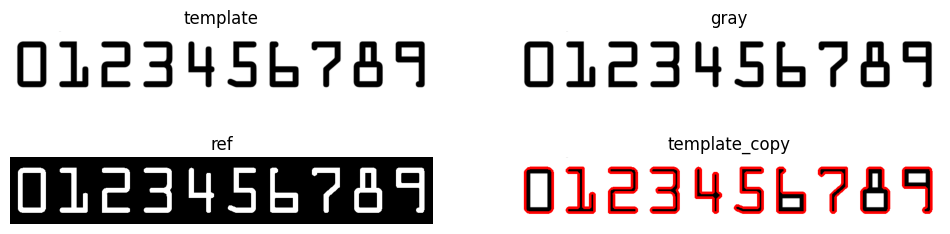

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# 读取模板图片
template  = cv2.imread(args['template'])
# 灰度化处理
gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# 二值化处理
_, ref = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)

# 查找轮廓，mode为只查找最外层轮廓。
# ref_contours是轮廓点列表，列表中每个元素是一个 ndarray 数组，表示轮廓上所有点的坐标
ref_contours, _ = cv2.findContours(ref, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 画出所有轮廓,原图会被直接修改
template_copy=template.copy()
cv2.drawContours(template_copy, ref_contours, -1, (0, 0, 255), 3);

# 计算每个轮廓的最大外接矩形，其与轮廓一一对应，但是是乱序的
bounding_boxes = [cv2.boundingRect(c) for c in ref_contours]
# 使用 zip 将 bounding_boxes 和 ref_contours 组合在一起
combined = list(zip(bounding_boxes, ref_contours))
# 根据 bounding_boxes 的 x 坐标排序
sorted_combined = sorted(combined, key=lambda item: item[0][0])
# 解压排序后的结果
sorted_boxes, sorted_contours = zip(*sorted_combined)

# 创建字典digits，存储排序后的数字区域
template_digits = {}
for (idx, c) in enumerate(sorted_contours):
    # 重新计算外接矩形
    (x, y, w, h) = cv2.boundingRect(c)
    # 取出每个数字区域，roi表示感兴趣的区域region of interest）
    template_roi = ref[y:y + h, x: x + w]
    # resize成合适的大小
    template_roi = cv2.resize(template_roi, (57, 88))
    template_digits[idx] = template_roi
    # 逐个显示roi，其结果应该是数字从0到9
    #cv_show('template_roi',template_roi)
    
#print(template_digits)
plt.figure(figsize=[12,3]);
plt.subplot(221); plt.imshow(template[:,:,::-1]);plt.axis('off');plt.title("template");
plt.subplot(222); plt.imshow(gray,cmap='gray');plt.axis('off');plt.title("gray");
plt.subplot(223); plt.imshow(ref,cmap='gray');plt.axis('off');plt.title("ref");
plt.subplot(224); plt.imshow(template_copy[:,:,::-1]);plt.axis('off');plt.title("template_copy");

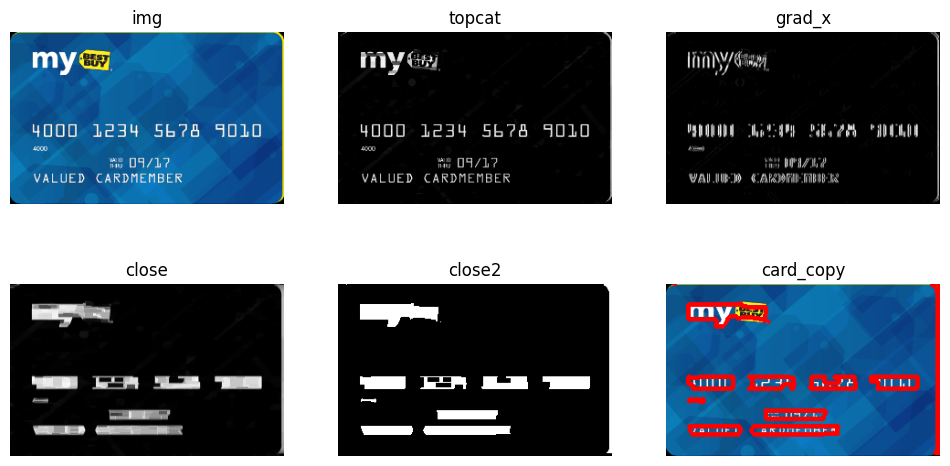

In [3]:
# 读取信用卡
card = cv2.imread(arges['image'])
# 对信用卡图片进行resize
h, w = card.shape[:2]
width = 300
r = width / w
card = cv2.resize(card, (300, int(h * r)))
gray_card = cv2.cvtColor(card, cv2.COLOR_BGR2GRAY)

# 顶帽操作, 突出更明亮的区域。信用卡是长方形，这一步使用长方形卷积核，效果更好
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
tophat = cv2.morphologyEx(gray_card, cv2.MORPH_TOPHAT, rect_kernel)

# 使用sobel算子计算x轴方向梯度
grad_x = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
# 使用绝对值得到梯度幅值
grad_x = np.absolute(grad_x)
# 归一化使得所有梯度值统一到 0 到 255 的范围内
min_val, max_val = np.min(grad_x), np.max(grad_x)
grad_x = ((grad_x - min_val) / (max_val - min_val)) * 255
# 修改一下数据类型
grad_x = grad_x.astype('uint8')

# 闭操作, 先膨胀, 再腐蚀, 可以把数字连在一起.
close = cv2.morphologyEx(grad_x, cv2.MORPH_CLOSE, rect_kernel)

# 通过OTSU算法找到合适的阈值, 进行全局二值化操作.
_, thresh_card = cv2.threshold(close, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# 中间还有空洞, 再来一个闭操作
sq_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
close2 = cv2.morphologyEx(thresh_card, cv2.MORPH_CLOSE, sq_kernel)

# 查找轮廓
card_contours, _ = cv2.findContours(close2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 在原图上画轮廓
card_copy = card.copy()
cv2.drawContours(card_copy, card_contours, -1, (0, 0, 255), 3)

plt.figure(figsize=[12,6]);
plt.subplot(231); plt.imshow(card[:,:,::-1]);plt.axis('off');plt.title("img");
plt.subplot(232); plt.imshow(tophat,cmap='gray');plt.axis('off');plt.title("topcat");
plt.subplot(233); plt.imshow(grad_x,cmap='gray');plt.axis('off');plt.title("grad_x");
plt.subplot(234); plt.imshow(close,cmap='gray');plt.axis('off');plt.title("close");
plt.subplot(235); plt.imshow(close2 ,cmap='gray');plt.axis('off');plt.title("close2");
plt.subplot(236); plt.imshow(card_copy[:,:,::-1]);plt.axis('off');plt.title("card_copy");

In [4]:
digit_group_boxes = []
for c in card_contours:
    # 计算外接矩形
    (x, y, w, h) = cv2.boundingRect(c)
    # 计算外接矩形的长宽比例
    ar = w / float(h)
    # 选择合适的区域
    if ar > 2.5 and ar < 4.0:
        # 在根据实际的长宽做进一步的筛选,下面是测试效果比较好的数值
        if (w > 40 and w < 55) and (h > 10 and h < 20):
            # 符合条件的外接矩形留下来
            digit_group_boxes.append((x, y, w, h))
            
# 对符合要求的轮廓进行从左到右的排序.
digit_group_boxes = sorted(digit_group_boxes, key=lambda x: x[0])
digit_group_boxes

[(24, 102, 50, 14), (90, 102, 51, 14), (157, 102, 51, 14), (224, 102, 52, 14)]

In [6]:
# 1. 遍历每个数字块, 把原图中的每个数字抠出来.
output=[]
for (i, (gx, gy, gw, gh)) in enumerate(digit_group_boxes):
    # 抠出每个数字块, 并且加点余量
    digit_group = gray_card[gy - 5: gy + gh + 5, gx - 5: gx + gw + 5]
    # 全局二值化处理，使数字更明显
    digit_group = cv2.threshold(digit_group, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # 2. 通过轮廓查找，分割出单个数字
    digit_contours, _ = cv2.findContours(digit_group, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 计算每个轮廓的最大外接矩形，其与轮廓一一对应，但是是乱序的
    digit_boxes = [cv2.boundingRect(c) for c in digit_contours]
	# 使用 zip 将 bounding_boxes 和 ref_contours 组合在一起
    combined2 = list(zip(digit_boxes, digit_contours))
	# 根据 bounding_boxes 的 x 坐标排序
    sorted_combined2 = sorted(combined2, key=lambda item: item[0][0])
	# 解压排序后的结果，得到排序后的单个数字
    sorted_digit_boxes, sorted_digit_contours = zip(*sorted_combined2)

    # 定义每一组匹配到的数字的存放列表
    group_output = []

    # 遍历排好序的数字轮廓
    for c in sorted_digit_contours:
        # 找到当前数字的轮廓, resize成合适的大小, 然后再进行模板匹配
        (x, y, w, h) = cv2.boundingRect(c)
        # 取出每个数字区域
        card_roi = digit_group[y: y + h, x: x + w]
        card_roi = cv2.resize(card_roi, (57, 88))
        
        # 3. 匹配模板中的每个数字
        match_scores = []
        for (idx, template_roi) in template_digits.items():
            result = cv2.matchTemplate(card_roi,template_roi, cv2.TM_CCOEFF)
            #print(result)
            # 只要最大值, 即分数
            # minVal, maxVal, minLoc, maxLoc= cv2.minMaxLoc(result)
            match_scores.append(result)
            # print(match_scores)
        # 找到分数最高的数字, 即我们匹配到的数字l
        group_output.append(str(np.argmax(match_scores)))
        #print(card_digits)
        
    # 画出轮廓和显示数字
    
    cv2.rectangle(card, (gx - 5, gy - 5), (gx + gw + 5, gy + gh + 5), (0, 0, 255), 1)
    cv2.putText(card, ''.join(group_output), (gx, gy - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    output.extend(group_output)
cv_show('card', card)

In [7]:
output

['4',
 '0',
 '0',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '0']